# Abbreviation

P1_H1_EDA : Relais für die Erfassung der Betriebsstunden für Pumpe 1

P4_H1_EDA : Relais für die Erfassung der Betriebsstunden für Pumpe 4

Z1_Bad_H1_EDA: Zähler für el. Heizstrom im Haushalt

Z1_RLT_H1_EDA: Zähler für Ventilator im Haushalt

Z1_TWW_H1_EDA: Zähler für TWWP im Haushalt (TWWP?)

Z_EV_H1_EDA: Zähler für elektrischen Verbraucher

Z_EA_H1_EDA: Zähler für E-AUTO (only some of them)

In [1]:
import pandas as pd #Using pandas to read csv data

from matplotlib import pyplot as plt #for ploting

import numpy as np

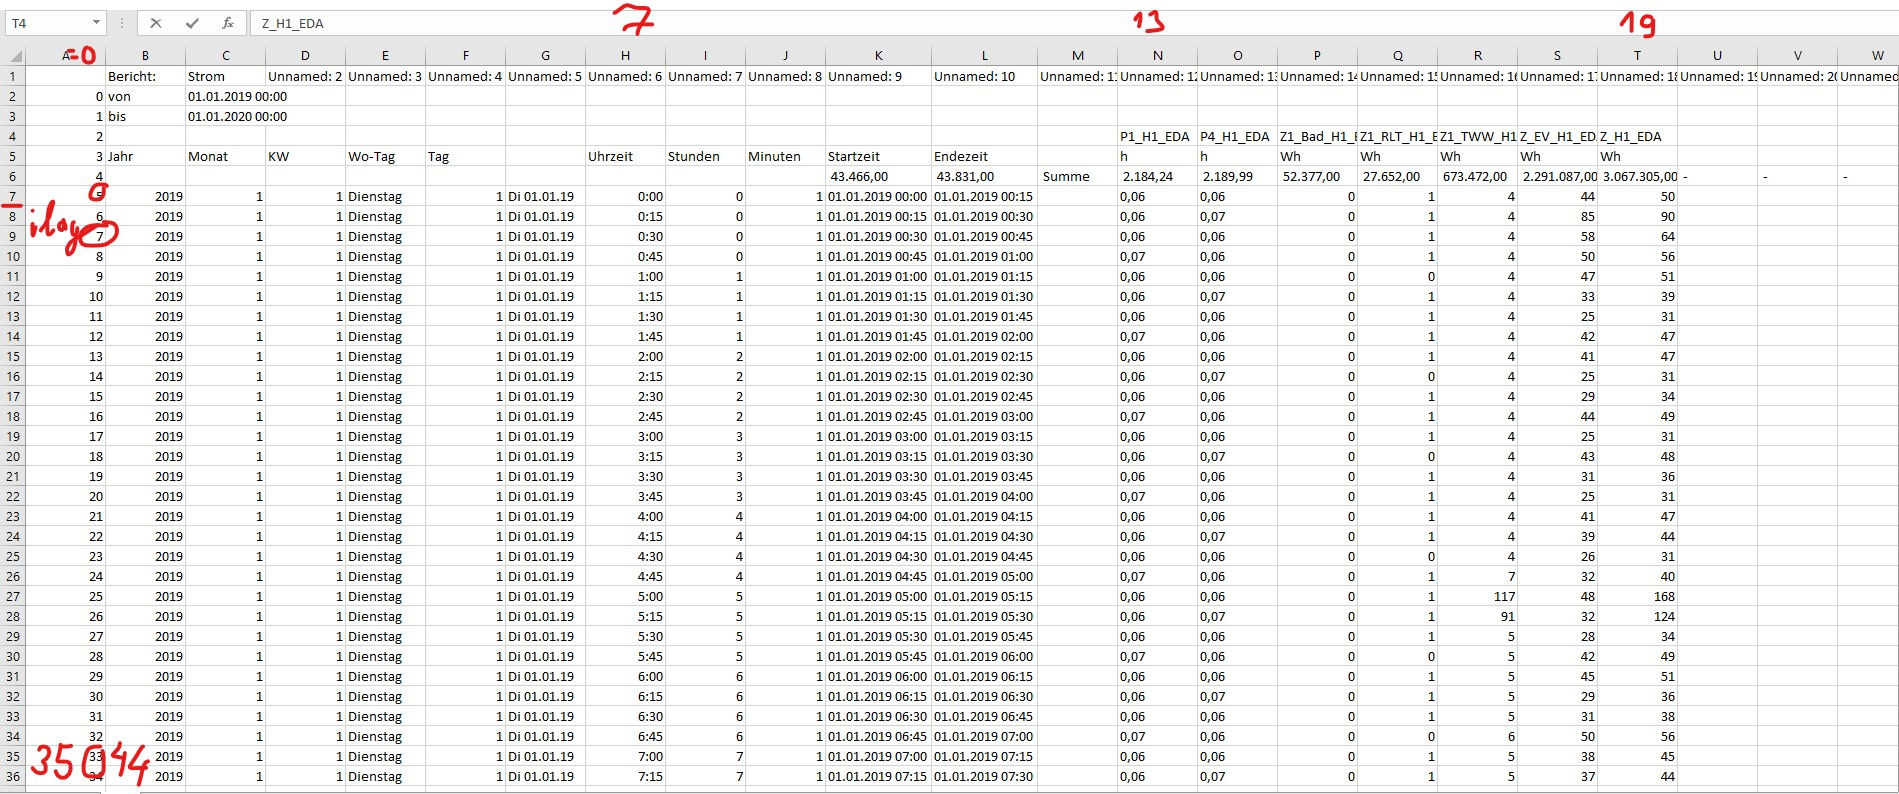

```python
test = data.iloc[5:101,13:20] #row 5 to 100 (equivalent day 1), column 13 to 19
pumpe1    = data.iloc[5:101,13]
pumpe4    = data.iloc[5:101,14]
heizstrom = data.iloc[5:101,15]
ventilator= data.iloc[5:101,16]
TWWP      = data.iloc[5:101,17]
el_Ver    = data.iloc[5:101,18]
Hauptzähler    = data.iloc[5:101,19]

time      = data.iloc[5:101,7]
```

```python

#test code

dataframe = pd.read_csv('./2019_fixed/H1.csv', delimiter=',', low_memory=False) #dataframe has type pandas.core.frame.dataframeFrame
#this block transform the convert the fixed dataframe into the dataframe for the modell "from sklearn.ensemble import RandomForestClassifier"
offsetRow = 5
timestampPerDay = 96
numberOfDays=int((dataframe.shape[0]-offsetRow)/timestampPerDay)

weekdayDict = {
    "Montag": 0,
    "Dienstag": 1,
    "Mittwoch": 2,
    "Donnerstag": 3,
    "Freitag": 4,
    "Samstag": 5,
    "Sonntag": 6,
}

weekday = dataframe.iloc[offsetRow+0*timestampPerDay,4]

def convertCommaDot(s):
    return float(s.replace(',','.'))

def get_data_from_table(day,offset,timestampPerDay,columnNr,dataframe):
    data = dataframe.iloc[offsetRow+day*timestampPerDay:(timestampPerDay+offsetRow)+day*timestampPerDay,columnNr] #Data type = pandas.Series of string
    data = list(map(convertCommaDot, data))
    return data

initStep = False
#this part write information in list
listDataframe = [] #Initialize list
for day in range(numberOfDays):
    # 1.part: important information: day in year, weekday, date 
    date = dataframe.iloc[offsetRow+day*timestampPerDay,6] #(to read, not an input for model)
    weekday = dataframe.iloc[offsetRow+day*timestampPerDay,4]
    weekday = weekdayDict[weekday]                    #change to int for input in model
    row = [date, day, weekday]                        #day 0 -> 364 / 365
    
    # 2.part: data. Not include timestamp of data.
    '''
    P1_EDA = get_data_from_table(day,offsetRow,timestampPerDay,13,dataframe)
    row.extend(P1_EDA)
    P4_EDA = get_data_from_table(day,offsetRow,timestampPerDay,14,dataframe)
    row.extend(P4_EDA)
    Z1_Bad = get_data_from_table(day,offsetRow,timestampPerDay,15,dataframe)
    row.extend(Z1_Bad)
    Z1_RLT = get_data_from_table(day,offsetRow,timestampPerDay,16,dataframe)
    row.extend(Z1_RLT)
    Z1_TWW = get_data_from_table(day,offsetRow,timestampPerDay,17,dataframe)
    row.extend(Z1_TWW)
    EA_EDA = get_data_from_table(day,offsetRow,timestampPerDay,19,dataframe)
    row.extend(EA_EDA)
    '''
    EV_EDA = get_data_from_table(day,offsetRow,timestampPerDay,18,dataframe)
    row.extend(EV_EDA)
    
    
    #now row have all the input data needed (filling up later: label)
    listDataframe.append(row)

#transform list to df and write to new csv data
df = pd.DataFrame(listDataframe)        
#write to csv file    
df.to_csv("test_2019_H1.csv")
```

In [2]:
#dictionary for column number
columnDict = {
    13: "Relais für die Erfassung der Betriebsstunden für Pumpe 1",
    14: "Relais für die Erfassung der Betriebsstunden für Pumpe 4",
    15: "Zähler für el. Heizstrom im Haushalt",
    16: "Zähler für Ventilator im Haushalt",
    17: "Zähler für TWWP im Haushalt (TWWP?)",
    18: "Zähler für elektrischen Verbraucher",
    19: "Hauptzähler",
}

In [3]:
P1_EDA_indexList = list(range(3,99))
P4_EDA_indexList = list(range(99,195))
Z1_Bad_indexList = list(range(195,291))
Z1_RLT_indexList = list(range(291,387))
Z1_TWW_indexList = list(range(387,483))
EV_EDA_indexList = list(range(483,579))
EA_EDA_indexList = list(range(579,675))

In [62]:
#There are some constant of those csv file
offsetRow = 5
timestampPerDay = 96

weekdayDict = {
    "Montag": 0,
    "Dienstag": 1,
    "Mittwoch": 2,
    "Donnerstag": 3,
    "Freitag": 4,
    "Samstag": 5,
    "Sonntag": 6,
}
#manual add summer time 
summertimeDate = ("So 31.03.19", "So 27.10.19", "So 29.03.20", "So 25.10.20") #extend later with more data'

In [66]:
def convertCommaDot(s):
    return float(s.replace(',','.'))

def get_data_from_table(day,offset,timestampPerDay,columnNr,dataframe):
    data = dataframe.iloc[offset+day*timestampPerDay:(timestampPerDay+offset)+day*timestampPerDay,columnNr] #Data type = pandas.Series of string
    #data = list(map(convertCommaDot, data))
    return data

#fill up listDataframe with the data in csvFilename
#input 
# listDataframe: Dataframe with type list (start with empty list)
# csvFilename: name of csv_data
def read_csv(listDataframe, csvFilename):
    dataframe = pd.read_csv(csvFilename, delimiter=',', low_memory=False)
    numberOfDays=int((dataframe.shape[0]-offsetRow)/timestampPerDay)
    weekday = dataframe.iloc[offsetRow+0*timestampPerDay,4]
    summertimeOffset = 0
    for day in range(numberOfDays):
        # 1.part: important information: day in year, weekday, date 
        date = dataframe.iloc[offsetRow+day*timestampPerDay,6] #(to read, not an input for model)
        
        weekday = dataframe.iloc[offsetRow+day*timestampPerDay,4]
        weekday = weekdayDict[weekday]                    #change to int for input in model
        row = [date, day, weekday]                        #day 0 -> 364 / 365
        
        if date in summertimeDate and day < 180:
            print("summer time start")
            print(date)
            summertimeOffset = -4 #get data from last hour the day before
            
        if date in summertimeDate and day > 180:
            print("winter time start")
            print(date)
            summertimeOffset = 0  #ignore data from 1st hour of the day
            
        EV_EDA = get_data_from_table(day,offsetRow + summertimeOffset,timestampPerDay,18,dataframe)
        row.extend(EV_EDA)


        #now row have all the input data needed (filling up later: label)
        listDataframe.append(row)
    

In [69]:
#input:
# csvFile: list of csv_data to read 
# csvOutput: filename of csv output

def prepare_data(listCsvFile, csvOutput):
    listDataframe = [] #init an empty list
    
    for csvFilename in listCsvFile:
        read_csv(listDataframe, csvFilename)

    #transform list to df and write to new csv data
    df = pd.DataFrame(listDataframe)        
    #write to csv file    
    df.to_csv(csvOutput)  


In [70]:
listCsvFile = ["./2019_fixed/H1.csv", "./2019_fixed/H2.csv", "./2020_fixed/H1.csv", "./2020_fixed/H2.csv"] #this step can be done with another function
csvOutput = "not_GMT.csv"

prepare_data(listCsvFile, csvOutput)

summer time start
So 31.03.19
winter time start
So 27.10.19
summer time start
So 31.03.19
winter time start
So 27.10.19
summer time start
So 29.03.20
winter time start
So 25.10.20
summer time start
So 29.03.20
winter time start
So 25.10.20
